# Phase II: Exploratory Data Analysis (EDA)

In this notebook, we will explore the AG News dataset to understand its structure, class distribution, and textual characteristics. This exploration will inform our preprocessing and modeling strategies.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
import os
import sys

# Add src to path to use data_loader
sys.path.append(os.path.abspath('../src'))
from data_loader import load_data, get_class_labels

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Ensure NLTK resources
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\My
[nltk_data]     Device\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
from wordcloud import WordCloud


## 1. Load Dataset
We use the existing `data_loader.py` utility to fetch the train and test sets.

In [4]:
try:
    train_df, test_df = load_data()
    print(f"Training instances: {len(train_df)}")
    print(f"Testing instances: {len(test_df)}")
except FileNotFoundError as e:
    print(f"Error: {e}")

Training instances: 120000
Testing instances: 7600


### Data Preview

In [5]:
train_df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


## 2. Class Distribution Analysis
Checking for class imbalance in the training set.

C:\Users\My Device\AppData\Local\Temp\ipykernel_18816\3312059639.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='CategoryName', data=train_df, palette='Spectral')


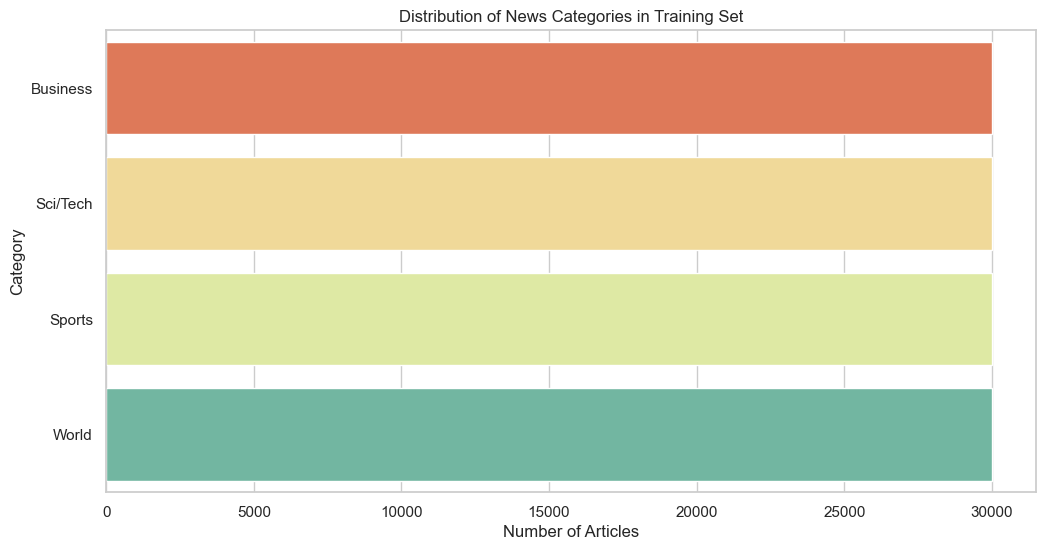

In [6]:
label_map = get_class_labels()
train_df['CategoryName'] = train_df['Class Index'].map(label_map)

sns.countplot(y='CategoryName', data=train_df, palette='Spectral')
plt.title('Distribution of News Categories in Training Set')
plt.xlabel('Number of Articles')
plt.ylabel('Category')
plt.show()

## 3. Text Length Analysis
Analyzing the length (number of words) in the article descriptions.

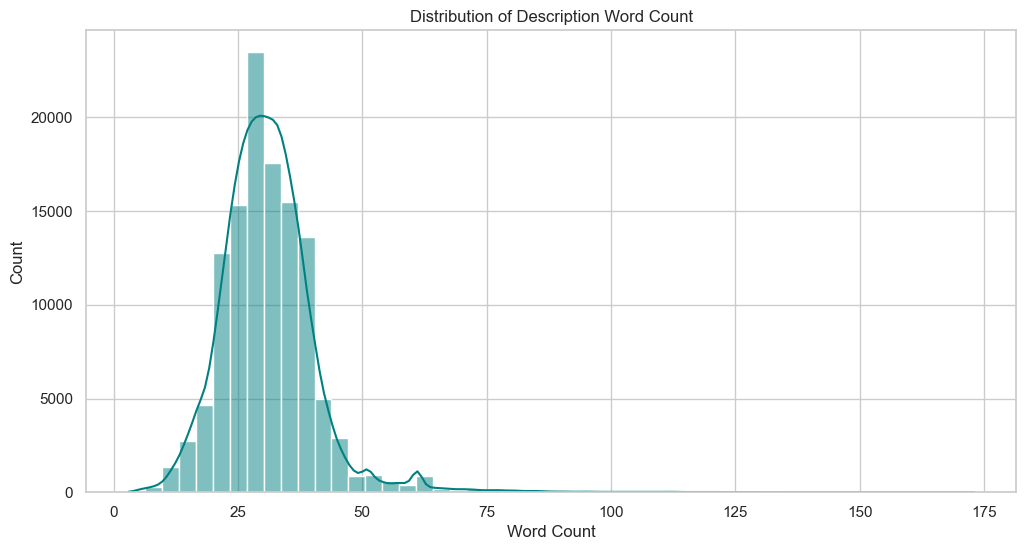

Mean word count: 31.06
Median word count: 30.0


In [7]:
train_df['Description_Length'] = train_df['Description'].apply(lambda x: len(str(x).split()))

sns.histplot(train_df['Description_Length'], bins=50, kde=True, color='teal')
plt.title('Distribution of Description Word Count')
plt.xlabel('Word Count')
plt.show()

print(f"Mean word count: {train_df['Description_Length'].mean():.2f}")
print(f"Median word count: {train_df['Description_Length'].median()}")

## 4. Category-Specific Word Analysis
Comparing the most frequent words across different categories.

C:\Users\My Device\AppData\Local\Temp\ipykernel_18816\3772925115.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette='crest')
C:\Users\My Device\AppData\Local\Temp\ipykernel_18816\3772925115.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette='crest')
C:\Users\My Device\AppData\Local\Temp\ipykernel_18816\3772925115.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette='crest')
C:\Users\My D

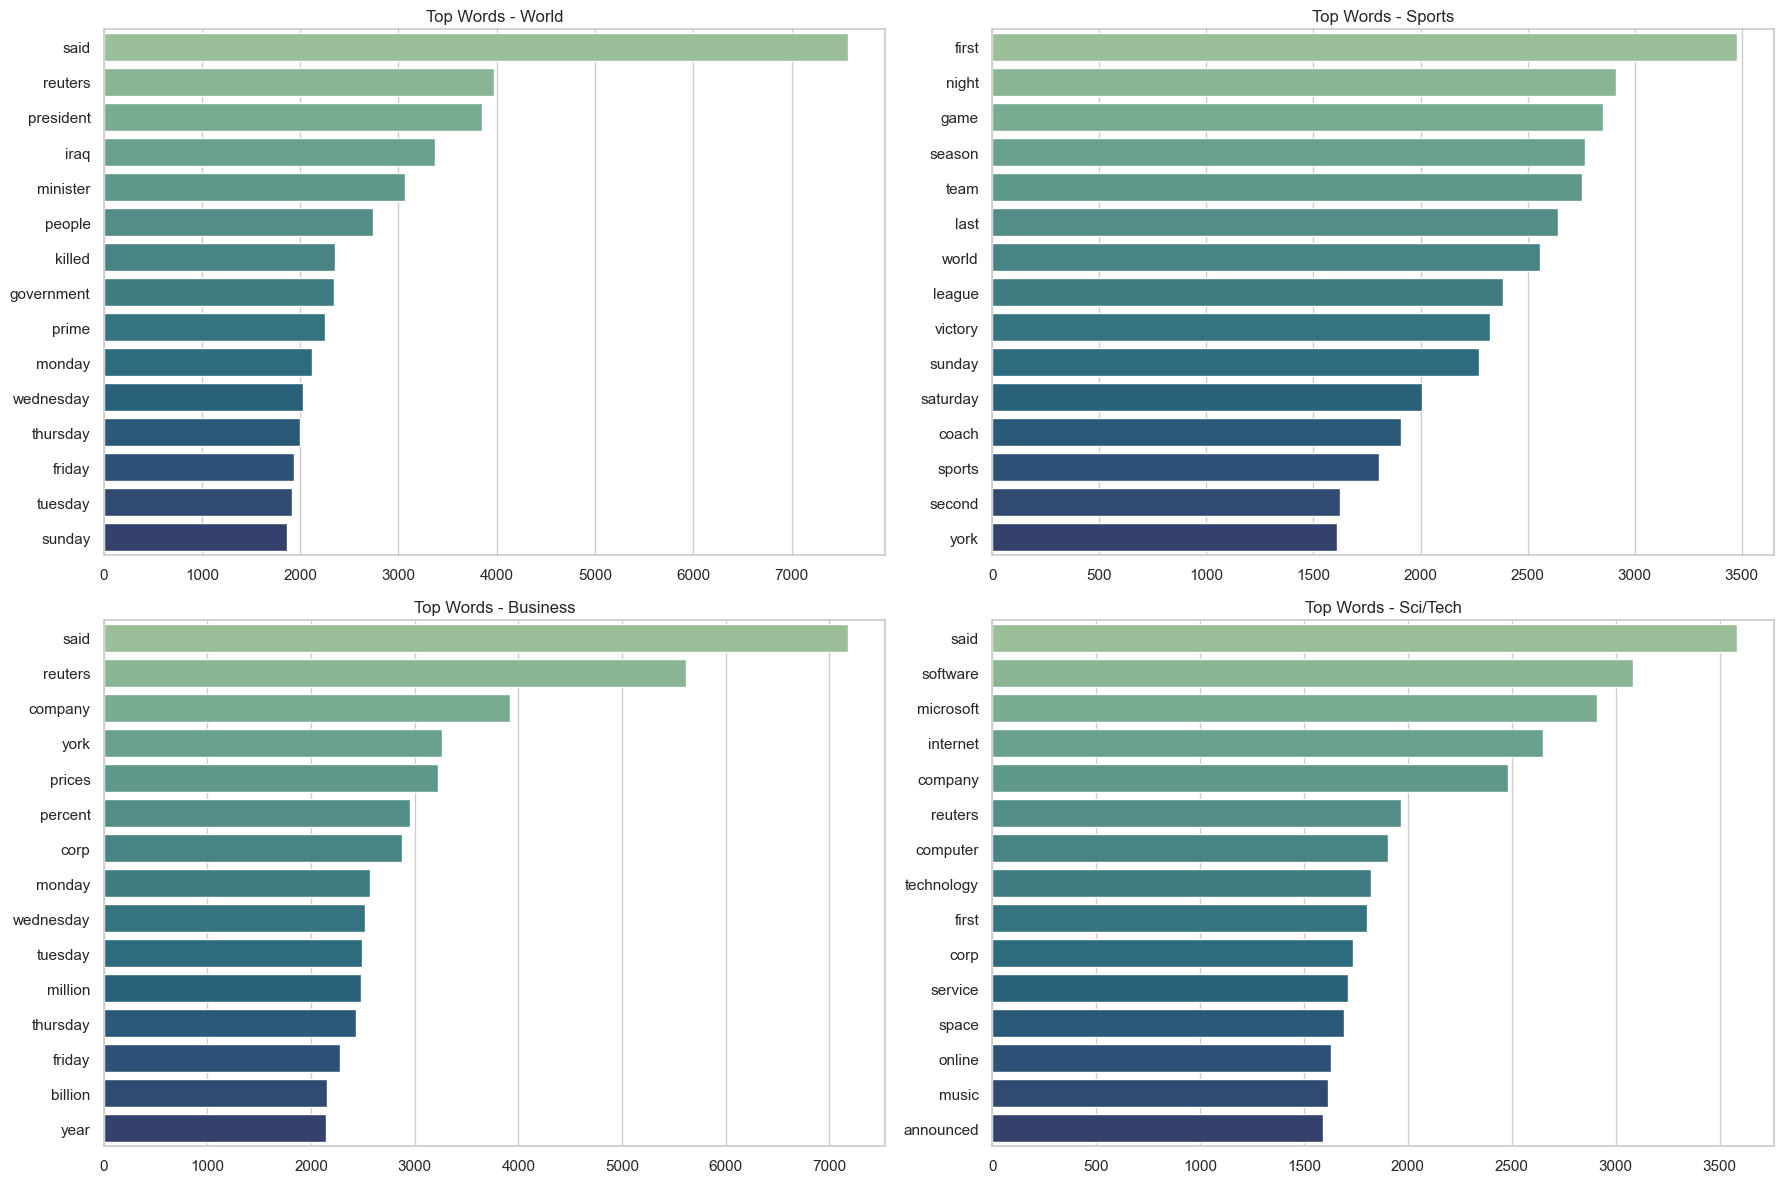

In [8]:
def get_top_words(df, category_id, n=15):
    text = " ".join(df[df['Class Index'] == category_id]['Description'].astype(str))
    words = text.lower().split()
    # Simple cleaning for analysis
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    filtered = [w for w in stripped if w not in stop_words and len(w) > 3]
    return Counter(filtered).most_common(n)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, (cat_id, name) in enumerate(label_map.items()):
    top_n = get_top_words(train_df, cat_id)
    words, counts = zip(*top_n)
    sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette='crest')
    axes[i].set_title(f'Top Words - {name}')

plt.tight_layout()
plt.show()

## 5. Word Clouds (Bonus)
Visualizing thematic words for each category.

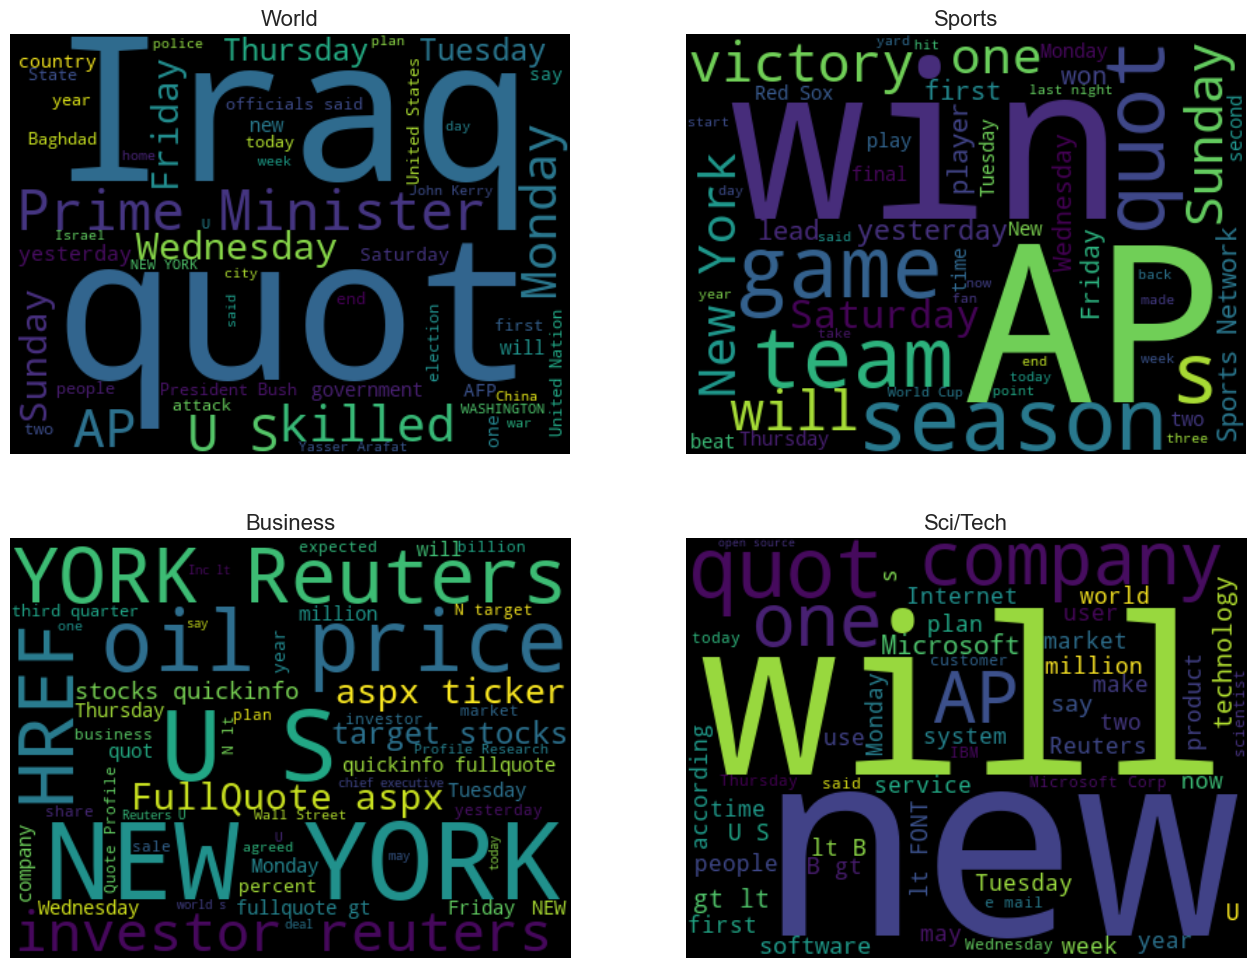

In [9]:
def generate_cloud(df, category_id, ax):
    text = " ".join(df[df['Class Index'] == category_id]['Description'].astype(str))
    wordcloud = WordCloud(width=400, height=300, background_color='black', max_words=50).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(label_map[category_id], fontsize=16)
    ax.axis('off')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, cat_id in enumerate(label_map.keys()):
    generate_cloud(train_df, cat_id, axes[i])

plt.show()